# Correct vs Wrong Chin Up Image Classification
## Exercise 1: Building a Convnet from Scratch
**_Estimated completion time: 5 to 7 minutes_**

In this exercise, we will build a classifier model from scratch that is able to distinguish Correct from Wrong Chin up. We will follow these steps:

1. Explore the example data
2. Build a small convnet from scratch to solve our classification problem
3. Evaluate training and validation accuracy

Let's go

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf 
#Use for images convert into array
import numpy as np 
#Use for image preprocessing
import cv2
# Use for handle data files 
import os 
#graphcial Representaion of images data 
import matplotlib.pyplot as plt
# use for rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import LSTM
from keras.regularizers import l2
from keras.layers import Conv2D
from keras.regularizers import l2
from keras.layers import BatchNormalization

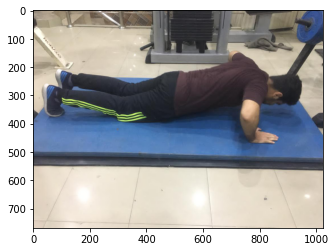

In [3]:
img = image.load_img("/content/drive/My Drive/Classification/basedata/testing data/Correct_Position/IMG-20201114-WA0073.jpg")
plt.imshow(img)

In [4]:
cv2.imread("/content/drive/My Drive/Classification/basedata/testing data/Correct_Position/IMG-20201114-WA0073.jpg").shape

(768, 1024, 3)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory("/content/drive/My Drive/Classification/basedata/training data" ,
                                          target_size = (200 ,200),
                                          batch_size = 3,
                                          class_mode = ("binary")
                                          )

Found 668 images belonging to 2 classes.


In [7]:
validation_dataset = validation.flow_from_directory("/content/drive/My Drive/Classification/basedata/validation data" ,
                                          target_size = (200 ,200),
                                          batch_size = 3,
                                          class_mode = ("binary")
                                          )

Found 120 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Correct_Position': 0, 'Wrong_Position': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Building a Small Convnet from Scratch to Get to 72% Accuracy

The images that will go into our convnet are 200x200 color images (in the next section on Data Preprocessing, we'll add handling to resize all the images to 200x200 before feeding them into the neural network).

Let's code up the architecture. We will stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 4x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters.

**NOTE**: This is a configuration that is widely used and known to work well for image classification. Also, since we have relatively few training examples using just three convolutional modules keeps the model small, which lowers the risk of overfitting (which we'll explore in more depth in Exercise 2.

In [61]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Conv2D(32, (3,3) , input_shape= (200,200,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3) , input_shape= (200,200,3), kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))



model.add(Conv2D(32, (3,3) , input_shape= (200,200,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(32, (3,3) , input_shape= (200,200,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))



model.add(Conv2D(32, (3,3) , input_shape= (200,200,3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(64, (3,3) , input_shape= (200,200,3)))
model.add(Conv2D(64, (3,3), kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [62]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="binary_crossentropy",
              optimizer = RMSprop(lr=0.001),
              metrics=["accuracy"])


In [64]:

history = model.fit_generator(
      train_dataset,
      steps_per_epoch=15,  
      epochs=220,
      validation_data=validation_dataset,
      validation_steps=20,
      verbose=2 )

Epoch 1/220
15/15 - 2s - loss: 0.8044 - accuracy: 0.6667 - val_loss: 0.9117 - val_accuracy: 0.3833
Epoch 2/220
15/15 - 2s - loss: 0.7763 - accuracy: 0.7111 - val_loss: 0.9746 - val_accuracy: 0.3500
Epoch 3/220
15/15 - 2s - loss: 0.7687 - accuracy: 0.7556 - val_loss: 0.8544 - val_accuracy: 0.5667
Epoch 4/220
15/15 - 2s - loss: 0.8570 - accuracy: 0.4889 - val_loss: 1.1387 - val_accuracy: 0.4667
Epoch 5/220
15/15 - 2s - loss: 0.9703 - accuracy: 0.4667 - val_loss: 1.1392 - val_accuracy: 0.5333
Epoch 6/220
15/15 - 2s - loss: 0.6997 - accuracy: 0.6889 - val_loss: 1.1048 - val_accuracy: 0.4167
Epoch 7/220
15/15 - 2s - loss: 0.7846 - accuracy: 0.6444 - val_loss: 0.8559 - val_accuracy: 0.5500
Epoch 8/220
15/15 - 2s - loss: 0.8259 - accuracy: 0.6444 - val_loss: 0.9261 - val_accuracy: 0.5833
Epoch 9/220
15/15 - 2s - loss: 0.8042 - accuracy: 0.6889 - val_loss: 0.8746 - val_accuracy: 0.5500
Epoch 10/220
15/15 - 2s - loss: 0.6870 - accuracy: 0.6222 - val_loss: 1.8123 - val_accuracy: 0.5667
Epoch 11/

In [ ]:
model.summary()

**Evaluating Accuracy and Loss for the Model**

Let's plot the training/validation accuracy and loss as collected during training:

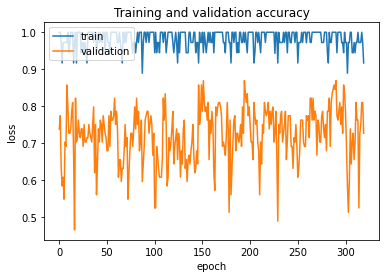

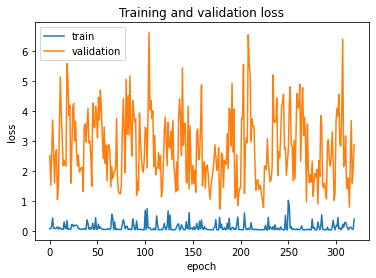

In [42]:
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see, we are overfitting like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as almost 60%. Our validation loss reaches its minimum after only five epochs.

Since we have a relatively small number of training examples, overfitting should be our number one concern. Overfitting happens when a model exposed to too few examples learns patterns that do not generalize to new data, i.e. when the model starts using irrelevant features for making predictions. For instance, if you, as a human, only see three images of people who are lumberjacks, and three images of people who are sailors, and among them the only person wearing a cap is a lumberjack, you might start thinking that wearing a cap is a sign of being a lumberjack as opposed to a sailor. You would then make a pretty lousy lumberjack/sailor classifier.

Overfitting is the central problem in machine learning: given that we are fitting the parameters of our model to a given dataset, how can we make sure that the representations learned by the model will be applicable to data never seen before? How do we avoid learning things that are specific to the training data?

In the next exercise, we'll look at ways to prevent overfitting in the Correct vs Wrong Chin up classification model.

In [ ]:
path_img = "/content/drive/My Drive/Classification/basedata/testing data/Correct_Position"
for i in os.listdir(path_img):

  img = image.load_img(path_img+'//'+i , target_size=(200 , 200 ,3))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X , axis=0)
  images = np.vstack([X])
  
  valid = model.predict(images)
  if valid == 0:
    print("Correct Position")
  else:
    print("Not Correct Position")